<a href="https://colab.research.google.com/github/jumarques03/SERS/blob/main/CP02_001_SERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte 1 – Regressão (Appliances Energy Prediction)

Você receberá um conjunto de dados contendo informações ambientais de uma residência
(temperatura, umidade, pressão, hora do dia etc.) e o consumo de energia dos eletrodomésticos
(Wh).


• Seu desafio será prever o consumo de energia a partir das variáveis ambientais.

• Teste diferentes modelos (ex.: Regressão Linear, Árvore de Regressão, Random Forest) e
avalie o desempenho com métricas como R², RMSE e MAE.

• Compare os resultados e discuta qual modelo melhor explica o consumo.

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/SERS-DATASETS/energydata_complete.csv', sep = ',')

df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.set_index('date', inplace=True)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

variaveis_ambientais = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9','RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9','T_out','Press_mm_hg','RH_out','Windspeed','Visibility','Tdewpoint']
X = df[variaveis_ambientais]
y=df['Appliances']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
print("Métricas do Modelo de Regressão Linear:")
print(f"R²: {r2:.4f}")  # Quanto mais perto de 1, melhor o modelo explica a variabilidade dos dados
print(f"MAE: {mae:.4f}")  # Quanto menor o valor do MAE, mais próximas as previsões estão dos valores reais.
print(f"RMSE: {rmse:.4f}") # Quanto menor o valor do RMSE, melhor o ajuste do modelo aos dados

Métricas do Modelo de Regressão Linear:
R²: 0.1492
MAE: 53.6388
RMSE: 93.6238


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# X são as variáveis de entrada (features)
X = df.drop("Appliances", axis=1)

# y é a variável que queremos prever
y = df["Appliances"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = RandomForestRegressor(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print("Métricas do Modelo de Random Forest:")
print(f"R²: {r2:.4f}")  # Quanto mais perto de 1, melhor o modelo explica a variabilidade dos dados
print(f"MAE: {mae:.4f}")  # Quanto menor o valor do MAE, mais próximas as previsões estão dos valores reais.
print(f"RMSE: {rmse:.4f}") # Quanto menor o valor do RMSE, melhor o ajuste do modelo aos dados

Métricas do Modelo de Random Forest:
R²: 0.5147
MAE: 34.1943
RMSE: 70.7106


In [ ]:
from sklearn.tree import DecisionTreeRegressor

X = df.drop("Appliances", axis=1)

# y é a variável que queremos prever
y = df["Appliances"]

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criando e treinando o modelo de árvore de regressão
modelo = DecisionTreeRegressor(random_state=42)
modelo.fit(X_train, y_train)

# Fazendo previsões
y_pred = modelo.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print("Métricas do Modelo de Árvore de Decisão:")
print(f"R²: {r2:.4f}")  # Quanto mais perto de 1, melhor o modelo explica a variabilidade dos dados
print(f"MAE: {mae:.4f}")  # Quanto menor o valor do MAE, mais próximas as previsões estão dos valores reais.
print(f"RMSE: {rmse:.4f}")  # Quanto menor o valor do RMSE, melhor o ajuste do modelo aos dados

Métricas do Modelo de Árvore de Decisão:
R²: 0.1798
MAE: 38.8726
RMSE: 90.5965


***Conclusão:***  

O modelo Random Forest apresentou o melhor desempenho com um R² de 0.51 e RMSE de 70.71 Wh. Este modelo é mais robusto e utiliza múltiplas árvores de decisão, o que explica sua eficiente execução.



---



# Parte 2 – Classificação (Smart Grid Stability)

Você receberá um conjunto de dados simulados de uma rede elétrica inteligente, com variáveis
como potência ativa, potência reativa, tensão e corrente. O dataset indica se a rede está estável ou
instável.


• Seu desafio será classificar a estabilidade da rede com base nas variáveis fornecidas.


• Treine modelos de classificação (ex.: Árvore de Decisão, KNN, Regressão Logística) e avalie o
desempenho com acurácia, matriz de confusão e F1-score.


• Compare os resultados e discuta qual modelo é mais confiável para detectar instabilidade

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/SERS-DATASETS/smart_grid_stability_augmented.csv', sep = ',')

df.head(7)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
5,6.999209,9.109247,3.784066,4.267788,4.429669,-1.857139,-0.670397,-1.902133,0.261793,0.077930,0.542884,0.469931,-0.017385,stable
6,6.710166,3.765204,6.929314,8.818562,2.397419,-0.614590,-1.208826,-0.574004,0.177890,0.397977,0.402046,0.376630,0.005954,unstable


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    60000 non-null  float64
 1   tau2    60000 non-null  float64
 2   tau3    60000 non-null  float64
 3   tau4    60000 non-null  float64
 4   p1      60000 non-null  float64
 5   p2      60000 non-null  float64
 6   p3      60000 non-null  float64
 7   p4      60000 non-null  float64
 8   g1      60000 non-null  float64
 9   g2      60000 non-null  float64
 10  g3      60000 non-null  float64
 11  g4      60000 non-null  float64
 12  stab    60000 non-null  float64
 13  stabf   60000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 6.4+ MB


Métricas do Modelo de Árvore de Decisão:
Acurácia: 0.8897
F1 score: 0.9132619619838322
Matriz de Confusão:


<Axes: >

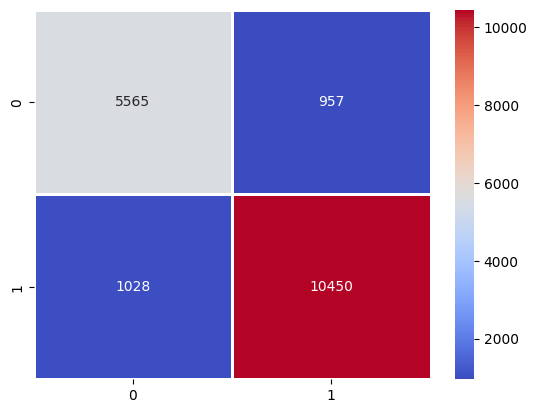

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import seaborn as sns
import matplotlib as plt

X = df.drop(["stab", "stabf"], axis=1)

# y é a variável que queremos prever
y = df["stabf"]

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criando e treinando o modelo de árvore de regressão
modelo = DecisionTreeClassifier(random_state=42)
modelo.fit(X_train, y_train)

# Fazendo previsões
y_pred = modelo.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, pos_label='unstable')   # Unstable = 1  --> Queremos detectar a instabilidade

print("Métricas do Modelo de Árvore de Decisão:")
print(f"Acurácia: {acc:.4f}")  # É a porcentagem de previsões que o modelo acertou.
print(f"F1 score: {f1}")  # Quanto mais perto de 1, melhor é o equilíbrio entre a Precisão e o Recall do modelo.
print("Matriz de Confusão:")
sns.heatmap(cm, cmap='coolwarm', annot=True, linewidth=1, fmt='d')

Métricas KNN:
Acurácia: 0.8178
F1 score: 0.8611945984845278
Matriz de Confusão:


<Axes: >

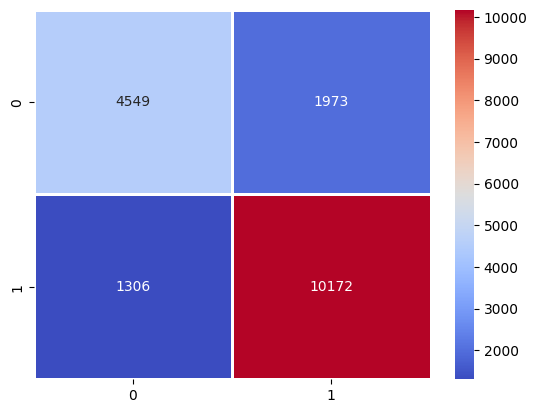

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

X = df.drop(["stab", "stabf"], axis=1)

# y é a variável que queremos prever
y = df["stabf"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, pos_label='unstable')   # Unstable = 1  --> Queremos detectar a instabilidade

print("Métricas KNN:")
print(f"Acurácia: {acc:.4f}")  # É a porcentagem de previsões que o modelo acertou.
print(f"F1 score: {f1}")  # Quanto mais perto de 1, melhor é o equilíbrio entre a Precisão e o Recall do modelo.
print("Matriz de Confusão:")
sns.heatmap(cm, cmap='coolwarm', annot=True, linewidth=1, fmt='d')

Métricas do Modelo de Regressão Logística:
Acurácia: 0.8115
F1 score: 0.8556108770585983
Matriz de Confusão:


<Axes: >

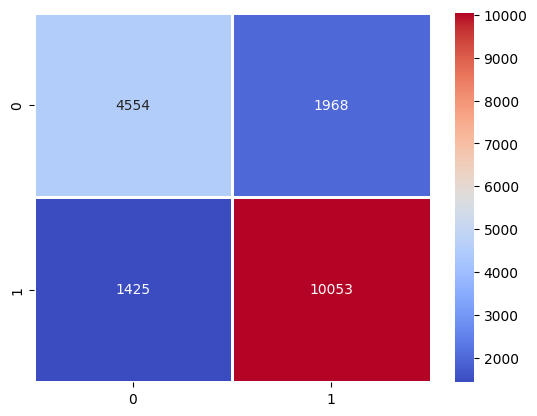

In [ ]:
from sklearn.linear_model import LogisticRegression

X = df.drop(["stab", "stabf"], axis=1)

# y é a variável que queremos prever
y = df["stabf"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
logreg = LogisticRegression(random_state=42)


logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, pos_label='unstable')   # Unstable = 1  --> Queremos detectar a instabilidade

print("Métricas do Modelo de Regressão Logística:")
print(f"Acurácia: {acc:.4f}")  # É a porcentagem de previsões que o modelo acertou.
print(f"F1 score: {f1}")  # Quanto mais perto de 1, melhor é o equilíbrio entre a Precisão e o Recall do modelo.
print("Matriz de Confusão:")
sns.heatmap(cm, cmap='coolwarm', annot=True, linewidth=1, fmt='d')

***Conclusão:***

O modelo de Árvore de Decisão apresentou um melhor desempenho com acurácia de 89%, F1-score de 91% e matriz de confusão com a maior identificação de casos de instabilidade e redução de falsos positivos.  